In [1]:
%matplotlib inline

# STATIC SAX TUTORIAL
In order to really get how SAX algorithm works, we popose were a detailed tutorial of how it works. In this section we will use really simple (and non realistic) data. The following example is leaning on __static_SAX__ file in __script__ folder of our repository. If you're already familiar with this algorithm and you are juste curious to see what happens on real EEGdata, please go to the second section.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.stats import norm
sys.path.append("..")
from script.static_SAX import znormalization, paa_transform,paa_to_alphabet, sax_transform

# STATIC SAX ON SIMPLE DATA

In [3]:
data1 = np.asarray([2.02, 2.33, 2.99, 6.85, 9.20, 8.80, 7.50, 6.00, 5.85, 3.85, 4.85, 3.85, 2.22, 1.45, 1.34, 1.42, 3.68, 5.65, 4.23, 6.81])
data2 = np.asarray([0.50, 1.29, 2.58, 3.83, 3.25, 4.25, 3.83, 5.63, 6.44, 6.25, 8.75, 8.83, 3.25, 0.75, 0.72, 1.02, 4.56, 3.21, 5.51, 4.95])
time_series = np.asarray([data1,data2])

So we have here a numpy array of two (very simple) time series. What about plotting our data just to see what it's look like ?

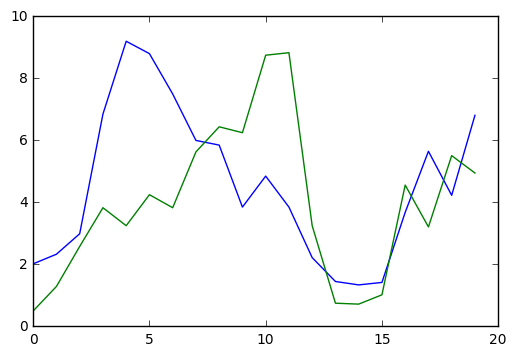

In [4]:
    plt.plot(range(time_series.shape[1]),time_series[0,:])
    plt.plot(range(time_series.shape[1]),time_series[1,:])

Here we have two signals with more or less the same amplitude. But in general, we prefer normalize these data.

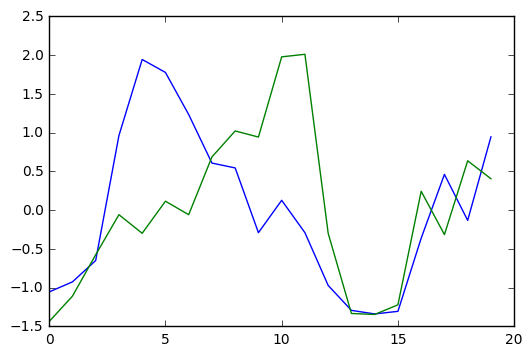

In [5]:
ztime_serie = znormalization(time_series)
plt.plot(range(ztime_serie.shape[1]),ztime_serie[0,:])
plt.plot(range(ztime_serie.shape[1]),ztime_serie[1,:])

Nothing surprising so far, the global trend has not changed because we just centered and reduced data. We will now perform PAA transformation using 4 intervals and plot the result on top of the real curve.

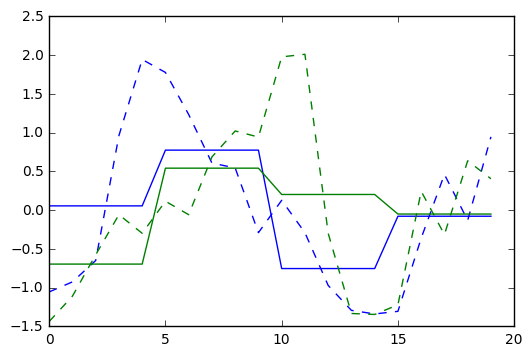

In [6]:
transform1 = paa_transform(ztime_serie, 4)
plt.plot(range(ztime_serie.shape[1]), ztime_serie[0,:], 'b--')
plt.plot(range(ztime_serie.shape[1]), np.repeat(transform1, ztime_serie.shape[1]/4, axis = 1)[0,:], 'b')
plt.plot(range(ztime_serie.shape[1]), ztime_serie[1,:], 'g--')
plt.plot(range(ztime_serie.shape[1]), np.repeat(transform1, ztime_serie.shape[1]/4, axis = 1)[1,:], 'g')

The truth is that having this kind of discretization is disappointing since we loose a lot of information... But to really get the importance of the __discretization parameter__ we will try again with something like 10 intervals ! 

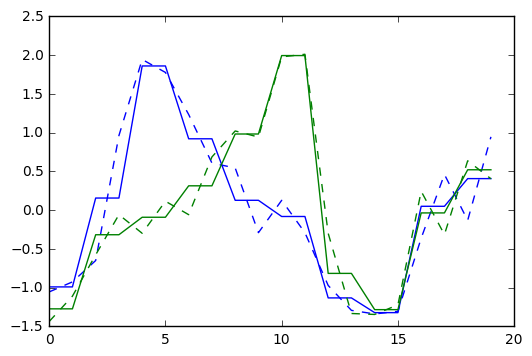

In [7]:
transform2 = paa_transform(ztime_serie, 10)
plt.plot(range(ztime_serie.shape[1]), ztime_serie[0,:], 'b--')
plt.plot(range(ztime_serie.shape[1]), np.repeat(transform2, ztime_serie.shape[1]/10, axis = 1)[0,:], 'b')
plt.plot(range(ztime_serie.shape[1]), ztime_serie[1,:], 'g--')
plt.plot(range(ztime_serie.shape[1]), np.repeat(transform2, ztime_serie.shape[1]/10, axis = 1)[1,:], 'g')

Now the discretization fits much more better our curves. So our discretization will contains the nearly the same information than original data. Note that in our first exemple we had only 4 *points* and that now we have 10 _points_ so 2 times less than in the original data.
Now we have a discretization containing a good beahviour of the original signal, we will transform it into an alphabet. 
To begin with, we will take an numeric alphabet of size 10, and we will use gaussian assumption of the normalized data distribution.

Sax transformation for the first signal :  [1 5 9 8 5 4 1 0 5 6]
Sax transformation for the second signal :  [1 3 4 6 8 9 2 0 4 6]


(0, 10)

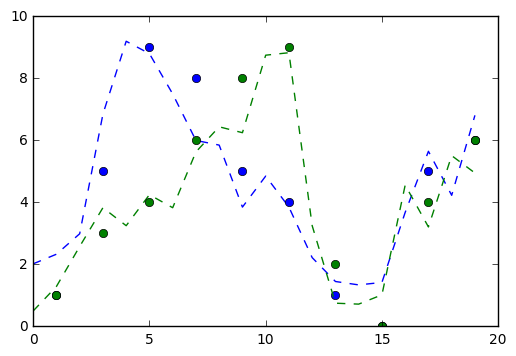

In [8]:
alphabet = range(10)
quantils = np.linspace(1./10, 1-1./10, 10-1)
gaus_percentils = np.asarray([norm.ppf(quantils) for i in xrange(transform2.shape[1])])
gaus_result = paa_to_alphabet(transform2, alphabet, gaus_percentils)
print "Sax transformation for the first signal : ", gaus_result[0,:]
print "Sax transformation for the second signal : ", gaus_result[1,:]

plt.plot(range(time_series.shape[1]), time_series[0,:], 'b--')
plt.plot(range(1,21,2),gaus_result[0,:], 'bo')
plt.plot(range(time_series.shape[1]), time_series[1,:], 'g--')
plt.plot(range(1,21,2),gaus_result[1,:], 'go')
plt.ylim([0,10])

Please note that the points are just a representation and some of them are taken together. Besides, we plot here the real datas just to have a good visulization, but points are computed on normalized data. 
So everything is good so far, but I'm sure you're telling yourself that we did here a strong assumption. And that's true, we assumed that our normalized data follows a gaussian distrbution. So we will compare our last results to the real distribution's percentils.

Sax transformation for the first signal :  [1 5 9 7 5 5 1 0 5 6]
Sax transformation for the second signal :  [1 3 4 6 8 9 2 1 5 7]


(0, 10)

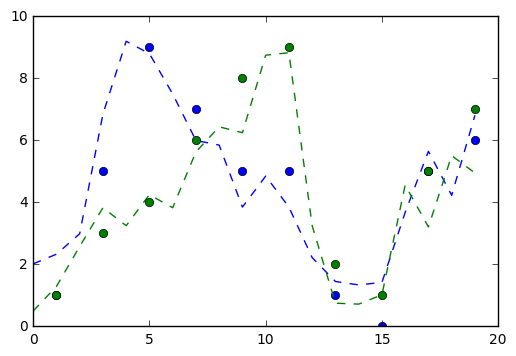

In [9]:
real_percentils0 = np.percentile(ztime_serie[0,:],quantils*100)
real_percentils1 = np.percentile(ztime_serie[1,:],quantils*100)
real_percentils = np.asarray([real_percentils0, real_percentils1])
real_result = paa_to_alphabet(transform2, alphabet, real_percentils)
print "Sax transformation for the first signal : ", real_result[0,:]
print "Sax transformation for the second signal : ", real_result[1,:]

plt.plot(range(time_series.shape[1]), time_series[0,:], 'b--')
plt.plot(range(1,21,2),real_result[0,:], 'bo')
plt.plot(range(time_series.shape[1]), time_series[1,:], 'g--')
plt.plot(range(1,21,2),real_result[1,:], 'go')
plt.ylim([0,10])

In [74]:
test = range(0,25)
print test
quantils = np.linspace(1./5, 1-1./5, 4)
print np.percentile(test,quantils*100)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[  4.8   9.6  14.4  19.2]


We have almost the same result by using the gaussian distribution assumption. So let visualize why we have this strange behaviour.

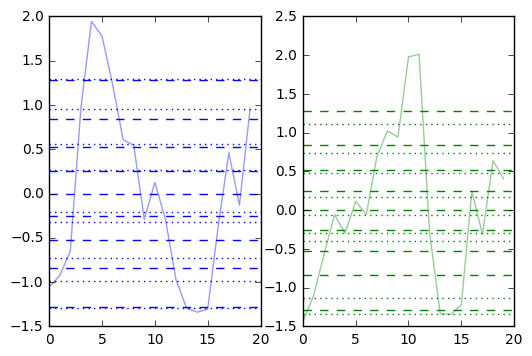

In [10]:
f, axarr = plt.subplots(1,2, sharey= False)
axarr[0].plot(range(ztime_serie.shape[1]), ztime_serie[0,:], 'b', alpha = 0.4)
for gpercentil,rpercentil in zip(gaus_percentils[0], real_percentils[0]):
    axarr[0].plot((0, ztime_serie.shape[1]), (gpercentil, gpercentil), 'b--')
    axarr[0].plot((0, ztime_serie.shape[1]), (rpercentil, rpercentil), 'b:')
axarr[1].plot(range(ztime_serie.shape[1]), ztime_serie[1,:], 'g', alpha = 0.4)
for gpercentil,rpercentil in zip(gaus_percentils[1], real_percentils[1]):
    axarr[1].plot((0, ztime_serie.shape[1]), (gpercentil, gpercentil), 'g--')
    axarr[1].plot((0, ztime_serie.shape[1]), (rpercentil, rpercentil), 'g:')

f.subplots_adjust(hspace=0.3)


+ Dashes lines represent gaussian percentils
+ Dots lines represent real distribution's percentil

We can note that we have slight changes between both type of percentils. That's the reason why we have really close results.
I'm sure you're telling yourself that we are concluding on dumb data. So what about having a look at the results of SAX on real EEG data ?

# STATIC SAX ON EGG DATA
Now that we know how SAX works, we are going to go faster on real EEG data.
The data used in this section come from UCI representing the action of opening or closing his eyes. You can download them on [EEG Eye State Data Set](https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State#). 

## Details about data we are using
+ Dataset obtained from a continuous EEG measurement.
+ EEG technology used: `Emotiv EEG Neuroheadset`. 
+ Duration: 117 seconds. 
+ Last column: Eye state detected using a camera and added manually. (1: eye-closed, 0: eye-opened)
+ Values in chronological order (from the top to the bottom of the dataset)
+ Since the dataset contains 14980 points, the frequency of measures is of 128 points per second, which is close to 10 times the [frequency of Beta wave](http://emedicine.medscape.com/article/1139332-overview#a2). 

Since the EEG headset used has 14 sensors, each time step corresponds of acquisition of 14 points. So excluding time we have a signal of 14 dimension. Each dimension contains it own information so we can neglect one during our EEG analysis. But here in order to understand and see how is working SAX on real data, we will use the eight first dimensions of the signal.

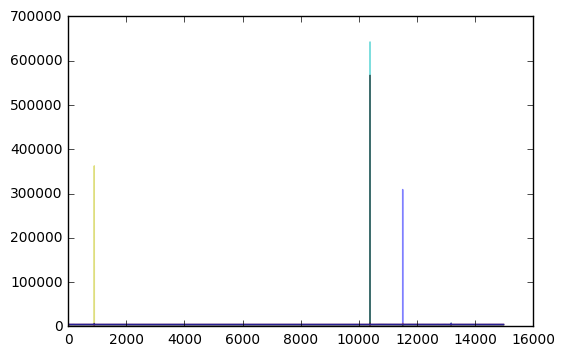

In [11]:
data = np.genfromtxt("../data/EEG_Eye_State.arff", comments = "@", delimiter = ",")
data = data.T
eeg = data[:8,:]

for rows in eeg : 
    plt.plot(range(eeg.shape[1]), rows, alpha = 0.5)

## Static SAX on raw data

We can see on that plot that we have serious outliers. Let assume that we didn't notice that and apply our previous functions. Seeing as we have decomposed the algorithm in the section 1, we will use the function *sax_transform* gathering all the required steps.

In [12]:
gaussian_SAX = sax_transform(eeg, 1498, 30, True)
real_SAX = sax_transform(eeg, 1498, 30, False)

for i in xrange(len(gaussian_SAX)):
    print "Sax transformation of signal ", i, " : ", gaussian_SAX[i,:]
print("\n")
for i in xrange(len(real_SAX)):
    print "Sax transformation of signal ", i, " : ", real_SAX[i,:]

Sax transformation of signal  0  :  [15 14 14 ..., 15 14 14]
Sax transformation of signal  1  :  [14 12 15 ..., 21 15 10]
Sax transformation of signal  2  :  [20 12 13 ..., 19 15 11]
Sax transformation of signal  3  :  [14 14 14 ..., 14 14 14]
Sax transformation of signal  4  :  [15 14 13 ..., 13 13 12]
Sax transformation of signal  5  :  [14 14 14 ..., 14 14 14]
Sax transformation of signal  6  :  [14 14 14 ..., 14 14 14]
Sax transformation of signal  7  :  [17 15 17 ..., 18 21 20]


Sax transformation of signal  0  :  [25 22 24 ..., 25 18  9]
Sax transformation of signal  1  :  [16 12 17 ..., 25 17  9]
Sax transformation of signal  2  :  [27 10 11 ..., 25 20  8]
Sax transformation of signal  3  :  [27 21 21 ..., 27 25 13]
Sax transformation of signal  4  :  [20 15 14 ..., 13 14  9]
Sax transformation of signal  5  :  [ 0  0  0 ...,  9 15 12]
Sax transformation of signal  6  :  [26 24 24 ..., 17 23 20]
Sax transformation of signal  7  :  [21 18 21 ..., 23 26 25]


Here is something intersting! It seems that on real EEG data, the gaussian distribution assumption introduces a big bias! 
Just have a look at the big differences ! The following plots show how important is the gaussian assumption on raw data. You'll have on the top the result with this assumption and on the bottom without any assumption.

#### First signal

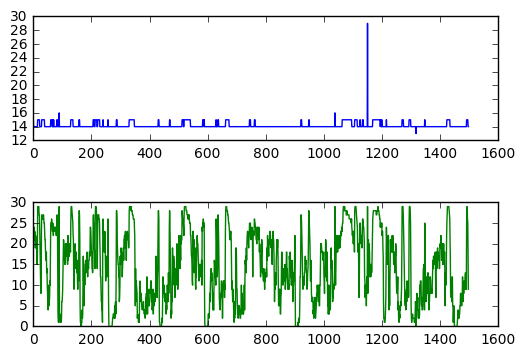

In [13]:
x_range = range(gaussian_SAX[6,:].shape[0])

f, axarr = plt.subplots(2, sharey= False)
axarr[0].plot(x_range, gaussian_SAX[0,:], 'b')
axarr[1].plot(x_range, real_SAX[0,:], 'g')
f.subplots_adjust(hspace=0.5)

#### Second signal

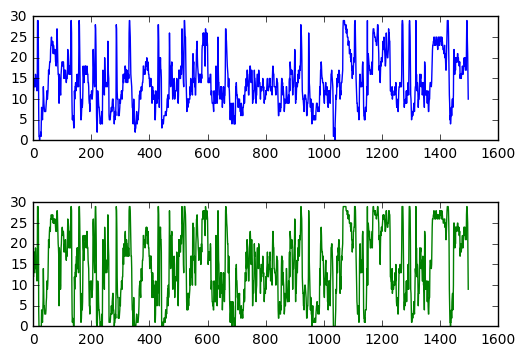

In [14]:
f, axarr = plt.subplots(2, sharey= False)
axarr[0].plot(x_range, gaussian_SAX[1,:], 'b')
axarr[1].plot(x_range, real_SAX[1,:], 'g')
f.subplots_adjust(hspace=0.5)

#### Third Signal

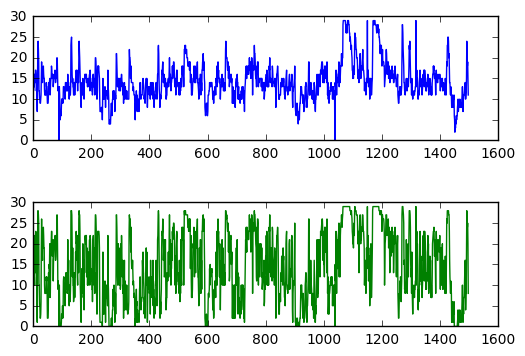

In [15]:
f, axarr = plt.subplots(2, sharey= False)
axarr[0].plot(x_range, gaussian_SAX[2,:], 'b')
axarr[1].plot(x_range, real_SAX[2,:], 'g')
f.subplots_adjust(hspace=0.5)

#### Fourth signal

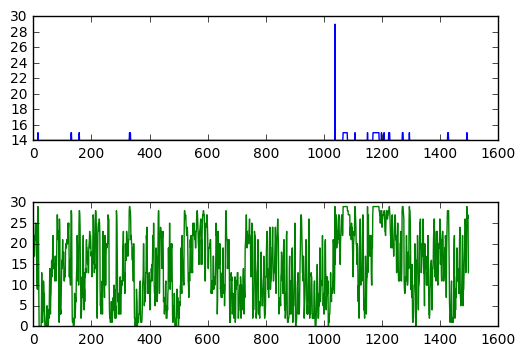

In [16]:
f, axarr = plt.subplots(2, sharey= False)
axarr[0].plot(x_range, gaussian_SAX[3,:], 'b')
axarr[1].plot(x_range, real_SAX[3,:], 'g')
f.subplots_adjust(hspace=0.5)

#### Fifth signal

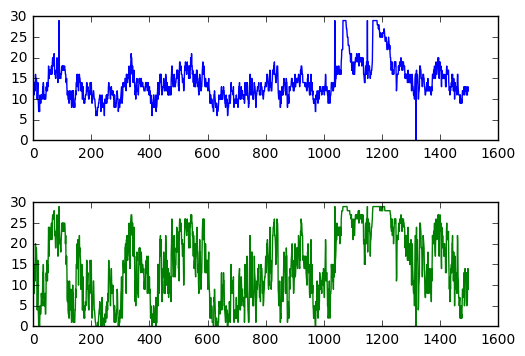

In [17]:
f, axarr = plt.subplots(2, sharey= False)
axarr[0].plot(x_range, gaussian_SAX[4,:], 'b')
axarr[1].plot(x_range, real_SAX[4,:], 'g')
f.subplots_adjust(hspace=0.5)

#### Sixth signal

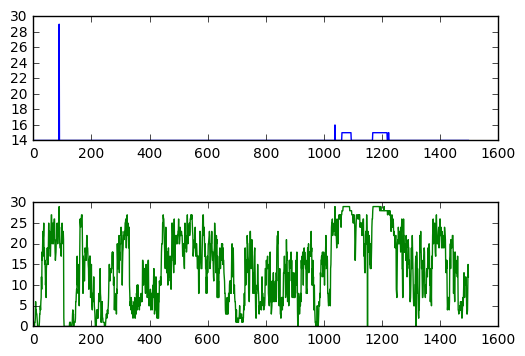

In [18]:
f, axarr = plt.subplots(2, sharey= False)
axarr[0].plot(x_range, gaussian_SAX[5,:], 'b')
axarr[1].plot(x_range, real_SAX[5,:], 'g')
f.subplots_adjust(hspace=0.5)

#### Seventh signal

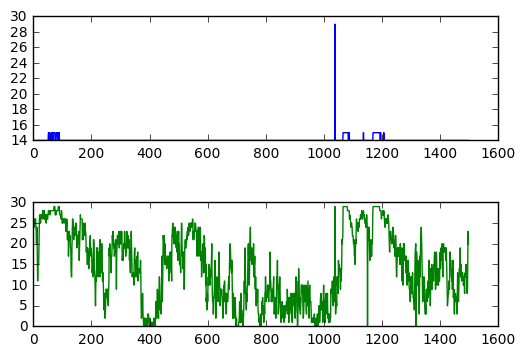

In [19]:
f, axarr = plt.subplots(2, sharey= False)
axarr[0].plot(x_range, gaussian_SAX[6,:], 'b')
axarr[1].plot(x_range, real_SAX[6,:], 'g')
f.subplots_adjust(hspace=0.5)

#### Last signal 

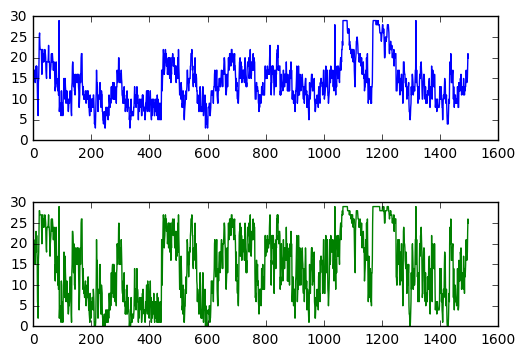

In [20]:
f, axarr = plt.subplots(2, sharey= False)
axarr[0].plot(x_range, gaussian_SAX[7,:], 'b')
axarr[1].plot(x_range, real_SAX[7,:], 'g')
f.subplots_adjust(hspace=0.5)

Apparently, the gaussian assumption has a huge impact on real (noisy) raw data. Both tranformation may have the same trend but don't take the same values (the gaussian assumption restricts high alphabet values) or may have a distinct trend (and this is really annoying !). So we show here the limits of this strong hypothesis. For some signals the gaussian percentiles are so squashed in that we only have 2 or 3 values used (except for outliers). In other cases even if we have a more realistic result we do not have the same information.
Is this difference caused by the outliers ? Let's check that.

## Static SAX on filtered data

The purpose of this part is to determine if the presence of outliers is the main cause of the biais observed in the previous part. So let's have a closer look to our data. 

(3800, 4800)

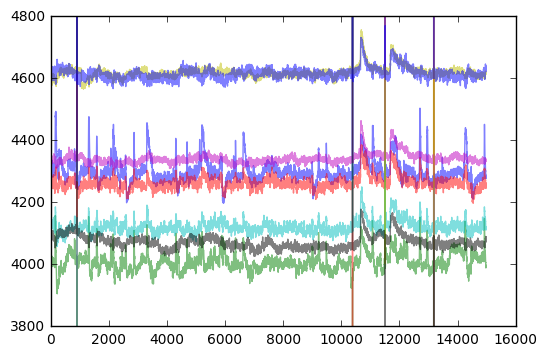

In [21]:
for rows in eeg : 
    plt.plot(range(eeg.shape[1]), rows, alpha = 0.5)
plt.ylim([3800,4800])

Please note that our outliers are exactly the same points for all signals. So it could be that the EEG headset moved on the head of the subject, we don't know ... But it's definitely an experimental error. So instead of simply remove these points we will just assume that the latest have the same value than the minimum / maximum. Since we just have 8 signals and a few outliers we will filter our dataset manually.

In [22]:
bounds = [(4100, 4600, -4, 1), (3800, 4200, -3 , 2), (4100,4500, -3, 2), (4000, 4300, -3, 2), (4200,4500, -4, 1), (4400, 4800, -3, 2), (3800, 4300, -3, 2), (4500,4800, -4, 0) ]
for row, lims in zip(eeg, bounds):
    s_row = sorted(row)
    row[row < lims[0]] = s_row[lims[2]]
    row[row > lims[1]] = s_row[lims[3]]

What about checking that we don't have outliers anymore ?

(3800, 4800)

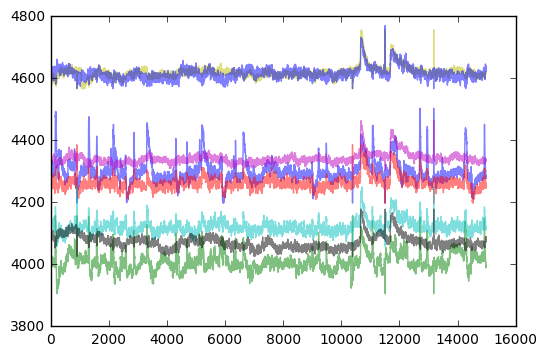

In [23]:
for rows in eeg : 
    plt.plot(range(eeg.shape[1]), rows, alpha = 0.5)
plt.ylim([3800,4800])

So this time we have a good filtered signal without any loss of information ! So let apply SAX on it.

In [24]:
filt_gaussian_SAX = sax_transform(eeg, 1498, 30, True)
filt_real_SAX = sax_transform(eeg, 1498, 30, False)

for i in xrange(len(filt_gaussian_SAX)):
    print "Sax transformation of filtered signal ", i, " : ", gaussian_SAX[i,:]
print("\n")
for i in xrange(len(real_SAX)):
    print "Sax transformation of filtered signal ", i, " : ", real_SAX[i,:]

Sax transformation of filtered signal  0  :  [15 14 14 ..., 15 14 14]
Sax transformation of filtered signal  1  :  [14 12 15 ..., 21 15 10]
Sax transformation of filtered signal  2  :  [20 12 13 ..., 19 15 11]
Sax transformation of filtered signal  3  :  [14 14 14 ..., 14 14 14]
Sax transformation of filtered signal  4  :  [15 14 13 ..., 13 13 12]
Sax transformation of filtered signal  5  :  [14 14 14 ..., 14 14 14]
Sax transformation of filtered signal  6  :  [14 14 14 ..., 14 14 14]
Sax transformation of filtered signal  7  :  [17 15 17 ..., 18 21 20]


Sax transformation of filtered signal  0  :  [25 22 24 ..., 25 18  9]
Sax transformation of filtered signal  1  :  [16 12 17 ..., 25 17  9]
Sax transformation of filtered signal  2  :  [27 10 11 ..., 25 20  8]
Sax transformation of filtered signal  3  :  [27 21 21 ..., 27 25 13]
Sax transformation of filtered signal  4  :  [20 15 14 ..., 13 14  9]
Sax transformation of filtered signal  5  :  [ 0  0  0 ...,  9 15 12]
Sax transformation

Oooh, it semms that we have the same problem on filtered data. Let check that with similar plots.

#### First signal

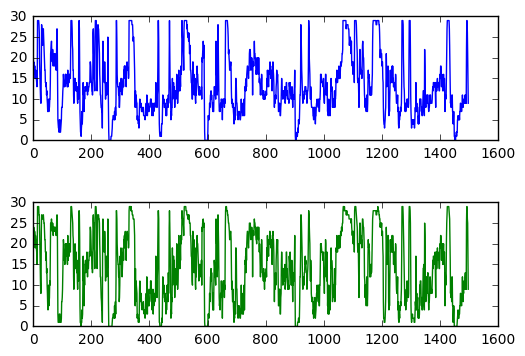

In [26]:
f, axarr = plt.subplots(2, sharey= False)
axarr[0].plot(x_range, filt_gaussian_SAX[0,:], 'b')
axarr[1].plot(x_range, filt_real_SAX[0,:], 'g')
f.subplots_adjust(hspace=0.5)

#### Second signal

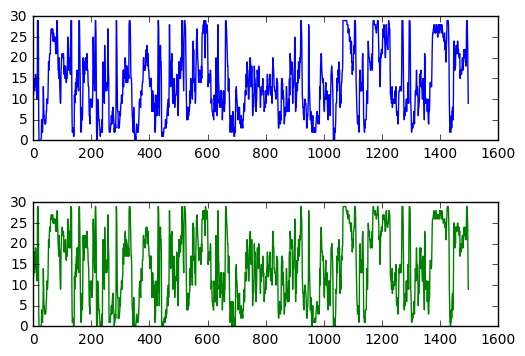

In [27]:
x_range = range(gaussian_SAX[6,:].shape[0])

f, axarr = plt.subplots(2, sharey= False)
axarr[0].plot(x_range, filt_gaussian_SAX[1,:], 'b')
axarr[1].plot(x_range, filt_real_SAX[1,:], 'g')
f.subplots_adjust(hspace=0.5)

#### Third signal

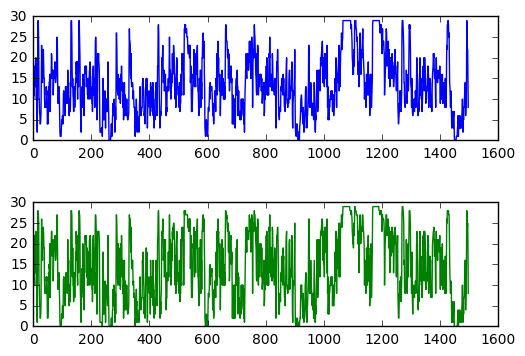

In [28]:
x_range = range(gaussian_SAX[6,:].shape[0])

f, axarr = plt.subplots(2, sharey= False)
axarr[0].plot(x_range, filt_gaussian_SAX[2,:], 'b')
axarr[1].plot(x_range, filt_real_SAX[2,:], 'g')
f.subplots_adjust(hspace=0.5)

#### Fourth signal

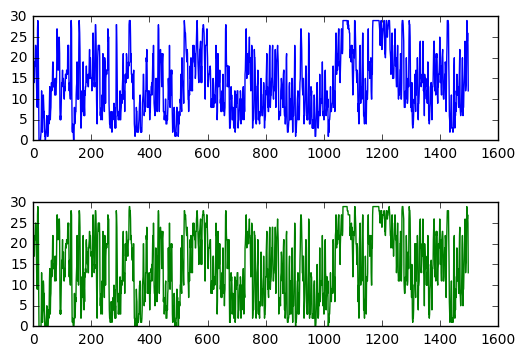

In [29]:
x_range = range(gaussian_SAX[6,:].shape[0])

f, axarr = plt.subplots(2, sharey= False)
axarr[0].plot(x_range, filt_gaussian_SAX[3,:], 'b')
axarr[1].plot(x_range, filt_real_SAX[3,:], 'g')
f.subplots_adjust(hspace=0.5)

#### Fifth signal

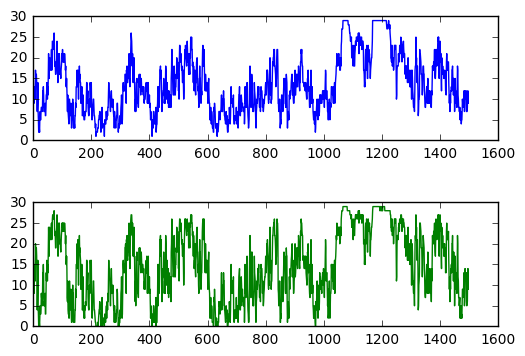

In [30]:
x_range = range(gaussian_SAX[6,:].shape[0])

f, axarr = plt.subplots(2, sharey= False)
axarr[0].plot(x_range, filt_gaussian_SAX[4,:], 'b')
axarr[1].plot(x_range, filt_real_SAX[4,:], 'g')
f.subplots_adjust(hspace=0.5)

#### Sixth signal

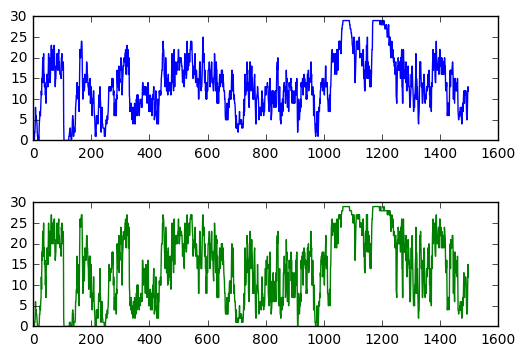

In [31]:
x_range = range(gaussian_SAX[6,:].shape[0])

f, axarr = plt.subplots(2, sharey= False)
axarr[0].plot(x_range, filt_gaussian_SAX[5,:], 'b')
axarr[1].plot(x_range, filt_real_SAX[5,:], 'g')
f.subplots_adjust(hspace=0.5)

#### Seventh signal

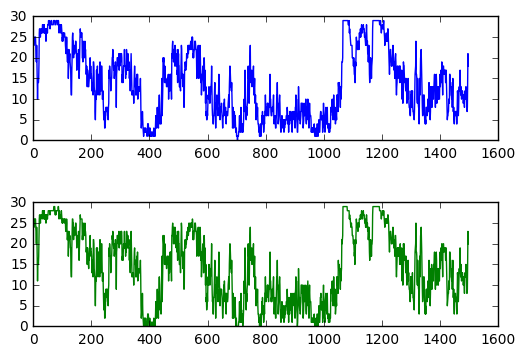

In [32]:
x_range = range(gaussian_SAX[6,:].shape[0])

f, axarr = plt.subplots(2, sharey= False)
axarr[0].plot(x_range, filt_gaussian_SAX[6,:], 'b')
axarr[1].plot(x_range, filt_real_SAX[6,:], 'g')
f.subplots_adjust(hspace=0.5)

#### Last signal

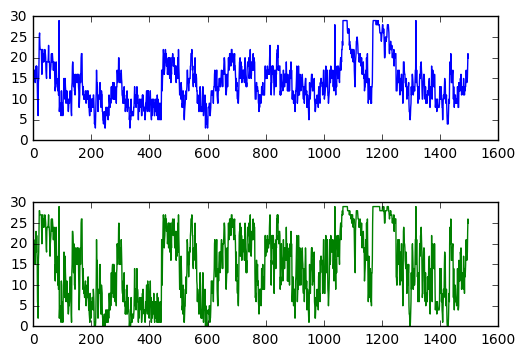

In [33]:
x_range = range(gaussian_SAX[6,:].shape[0])

f, axarr = plt.subplots(2, sharey= False)
axarr[0].plot(x_range, gaussian_SAX[7,:], 'b')
axarr[1].plot(x_range, real_SAX[7,:], 'g')
f.subplots_adjust(hspace=0.5)

So when we simply filter our data, it seems that the gaussian assumption does not have the same impact at all on the result of our transformation. In opposite on its demonstration on raw EEG data, here SAX transformation with gaussian assumption contains exactly the same trend that the "real" signal. The only thing that we must notice is that in general, the blue plot is less spread on y-axis, so it seems to flatten information and concentrate to the mean signal.

# Understand the critical role of outliers

The aim of the following experiment is to show the possible drawbacks of the gaussian assumption when dealing with noisy randomly generated data. 

First of all we generate a synthetic time serie that is stationary and follows a gaussian distribution. Then we add a single outlier and we run the SAX transformation. We test the same example for different values of the outlier.

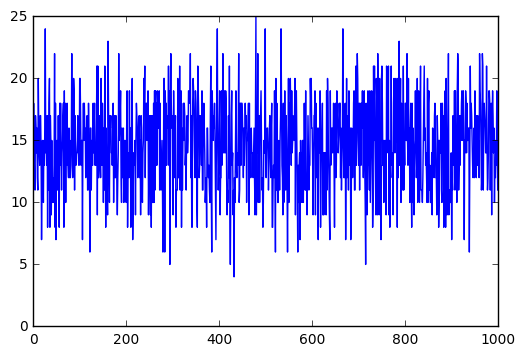

In [34]:
ts = np.random.randn(10000).reshape(1,-1)
ts_sax = sax_transform(ts, 1000, 30,use_gaussian_assumption = True)
plt.plot(range(len(ts_sax[0,:])), ts_sax[0,:], 'b')

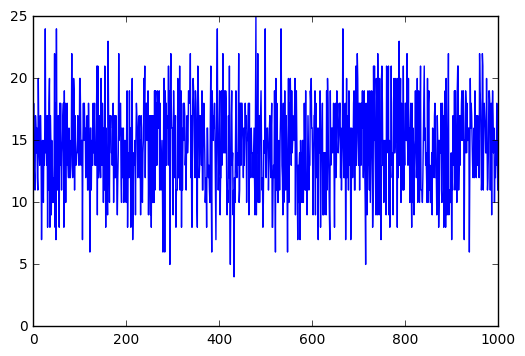

In [35]:
ts[0,500] = 10
ts_sax = sax_transform(ts, 1000, 30,use_gaussian_assumption = True)
plt.plot(range(len(ts_sax[0,:])), ts_sax[0,:], 'b')

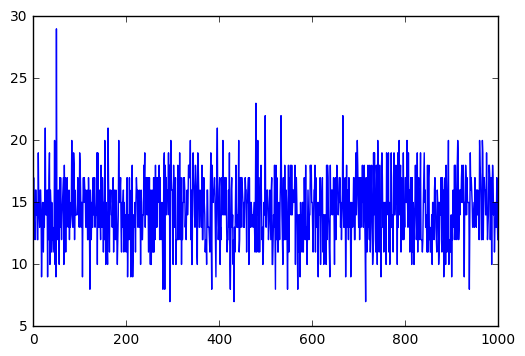

In [36]:
ts[0,500] = 100
ts_sax = sax_transform(ts, 1000, 30,use_gaussian_assumption = True)
plt.plot(range(len(ts_sax[0,:])), ts_sax[0,:], 'b')

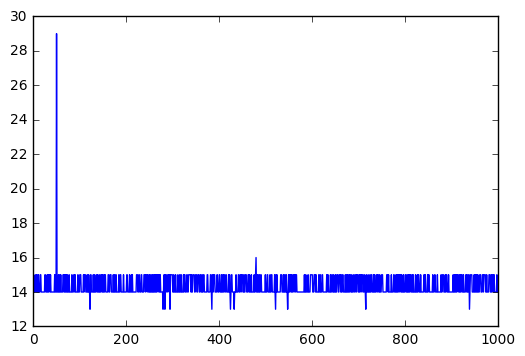

In [37]:
ts[0,500] = 1000
ts_sax = sax_transform(ts, 1000, 30,use_gaussian_assumption = True)
plt.plot(range(len(ts_sax[0,:])), ts_sax[0,:], 'b')

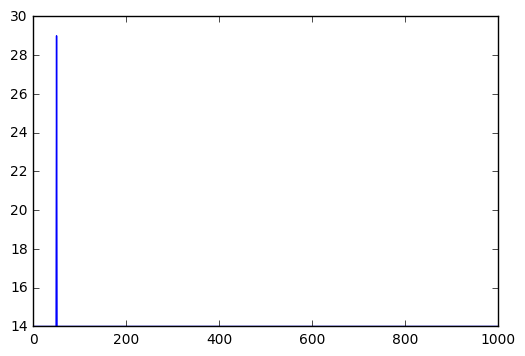

In [38]:
ts[0,500] = 100000
ts_sax = sax_transform(ts, 1000, 30,use_gaussian_assumption = True)
plt.plot(range(len(ts_sax[0,:])), ts_sax[0,:], 'b')

These plots show us how much ealing with outliers is important even on non complex data. Why ? Because first we z-normalize each signal so, with one or several outliers, it will crush signal's information and flatten the signal. On top of that, on complex data we showed that gaussian's percentiles tend to significantly flatten information. So that's why with a single big outlier, we may have a unique ray.

# To sum up

We tried in this tutorial to show you what's behind SAX algorithm, its limits and its strength. We can note that Gaussian assumption could be useful and quiet accurate if you have clean and already processed data and if you're really short in term of computation ressources. If you want to use it on raw data and you don't want to struggle with outliers processing, using real percentiles would be the best solution for you (but it needs more calculation times).
In bot case, SAX is a really powerful and simple tip to discretize even noisy raw complex data in a relative short amount of time. 